# Âè∞ÁÅ£ÈäÄË°åÁâåÂëäÂåØÁéáÁà¨Ëü≤Á∑¥Áøí
## ÁØÑ‰æã1Ôºö Á∑¥ÁøíÁà¨ÂèñÂè∞Âπ£Â∞çÂÖ∂‰ªñË≤®Âπ£ÂåØÁéáË≥áÊñô

In [1]:
import requests
from bs4 import BeautifulSoup
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt

### ÈÄ≤ÂÖ•Âè∞ÁÅ£ÈäÄË°åÁâåÂëäÂåØÁéáÁ∂≤È†ÅÔºöhttps://rate.bot.com.tw/xrt?Lang=zh-TW ÔºåÊì∑ÂèñÁï∂Êó•Âè∞Âπ£Â∞çÁæéÈáëÁöÑÂåØÁéáË≥áË®ä

In [2]:
# ÈÄ≤ÂÖ•Âè∞ÁÅ£ÈäÄË°åÁâåÂëäÂåØÁéáÁ∂≤È†ÅÔºåÊü•ÁúãÁï∂Êó•ÂåØÁéáË≥áÊñô
url = "https://rate.bot.com.tw/xrt?Lang=zh-TW"
resp = requests.get(url)
resp.encoding = 'utf-8'
# print(resp.text)  # Â¶ÇÊúâÈúÄË¶ÅÔºåÂàóÂç∞Âá∫Á∂≤È†ÅÂéüÂßãÁ¢º

html = BeautifulSoup(resp.text, "lxml")
rate_table = html.find(name='table', attrs={'title':'ÁâåÂëäÂåØÁéá'}).find(name='tbody').find_all(name='tr')

# Êü•Ë©¢ÁæéÈáë(‰πüÂ∞±ÊòØÂåØÁéáË°®ÁöÑÁ¨¨‰∏ÄÂÄãÂÖÉÁ¥†)Â∞çÂè∞Âπ£ÁöÑÂåØÁéá
currency = rate_table[0].find(name='div', attrs={'class':'visible-phone print_hide'})
print(currency.get_text().replace(" ", ""))  # ÂéªÊéâÁ©∫ÁôΩ

buy_rate = rate_table[0].find(name='td', attrs={'data-table':'Êú¨Ë°åÁèæÈáëË≤∑ÂÖ•'})
sell_rate = rate_table[0].find(name='td', attrs={'data-table':'Êú¨Ë°åÁèæÈáëË≥£Âá∫'})
print("Âç≥ÊôÇÁèæÈáëË≤∑ÂÖ•: %s, Âç≥ÊôÇÁèæÈáëË≥£Âá∫: %s" % (buy_rate.get_text(), sell_rate.get_text()))


ÁæéÈáë(USD)

Âç≥ÊôÇÁèæÈáëË≤∑ÂÖ•: 32.555, Âç≥ÊôÇÁèæÈáëË≥£Âá∫: 33.225


### ‰ΩúÊ•≠part 1ÔºöË´ãÂèÉËÄÉ‰∏äÈù¢ÁöÑÁØÑ‰æãÔºåË©¶ËëóÁà¨ÂèñÊâÄÊúâË≤®Âπ£Â∞çÂè∞Âπ£ÁöÑÂåØÁéá

In [6]:
import requests
from bs4 import BeautifulSoup

# ÁõÆÊ®ôÁ∂≤ÂùÄÔºàÂè∞ÁÅ£ÈäÄË°åÁâåÂëäÂåØÁéáÔºâ
url = "https://rate.bot.com.tw/xrt?Lang=zh-TW"

# ÂèñÂæóÁ∂≤È†ÅÂÖßÂÆπ
headers = {"User-Agent": "Mozilla/5.0"}
resp = requests.get(url, headers=headers)
resp.encoding = "utf-8"

# Ëß£Êûê HTML
html = BeautifulSoup(resp.text, "lxml")

# ÊâæÂà∞ÂåØÁéáË°®
rate_table = html.find("table", attrs={"title": "ÁâåÂëäÂåØÁéá"}).find("tbody").find_all("tr")

# ÂèñÂæóÊâÄÊúâË≤®Âπ£ÁöÑÂåØÁéá
for row in rate_table:
    # ÂèñÂæóË≤®Âπ£ÂêçÁ®±
    currency = row.find("div", attrs={"class": "visible-phone print_hide"})

    if currency:
        currency_name = currency.get_text().strip()

        # ÂèñÂæóË≤∑ÂÖ•ÂåØÁéá & Ë≥£Âá∫ÂåØÁéá
        buy_rate = row.find("td", attrs={"data-table": "Êú¨Ë°åÁèæÈáëË≤∑ÂÖ•"})
        sell_rate = row.find("td", attrs={"data-table": "Êú¨Ë°åÁèæÈáëË≥£Âá∫"})

        # Á¢∫‰øùÊï∏ÂÄºÂ≠òÂú®
        buy_rate_text = buy_rate.get_text().strip() if buy_rate else "ÁÑ°Ë≥áÊñô"
        sell_rate_text = sell_rate.get_text().strip() if sell_rate else "ÁÑ°Ë≥áÊñô"

        # Âç∞Âá∫ÁµêÊûú
        print(f"Ë≤®Âπ£Ôºö{currency_name}")
        print(f"Ë≤∑ÂÖ•ÂåØÁéáÔºö{buy_rate_text}")
        print(f"Ë≥£Âá∫ÂåØÁéáÔºö{sell_rate_text}")
        print("-" * 40)


Ë≤®Âπ£ÔºöÁæéÈáë (USD)
Ë≤∑ÂÖ•ÂåØÁéáÔºö32.555
Ë≥£Âá∫ÂåØÁéáÔºö33.225
----------------------------------------
Ë≤®Âπ£ÔºöÊ∏ØÂπ£ (HKD)
Ë≤∑ÂÖ•ÂåØÁéáÔºö4.084
Ë≥£Âá∫ÂåØÁéáÔºö4.288
----------------------------------------
Ë≤®Âπ£ÔºöËã±Èéä (GBP)
Ë≤∑ÂÖ•ÂåØÁéáÔºö41.43
Ë≥£Âá∫ÂåØÁéáÔºö43.55
----------------------------------------
Ë≤®Âπ£ÔºöÊæ≥Âπ£ (AUD)
Ë≤∑ÂÖ•ÂåØÁéáÔºö20.46
Ë≥£Âá∫ÂåØÁéáÔºö21.24
----------------------------------------
Ë≤®Âπ£ÔºöÂä†ÊãøÂ§ßÂπ£ (CAD)
Ë≤∑ÂÖ•ÂåØÁéáÔºö22.46
Ë≥£Âá∫ÂåØÁéáÔºö23.37
----------------------------------------
Ë≤®Âπ£ÔºöÊñ∞Âä†Âù°Âπ£ (SGD)
Ë≤∑ÂÖ•ÂåØÁéáÔºö24.13
Ë≥£Âá∫ÂåØÁéáÔºö25.04
----------------------------------------
Ë≤®Âπ£ÔºöÁëûÂ£´Ê≥ïÈÉé (CHF)
Ë≤∑ÂÖ•ÂåØÁéáÔºö36.47
Ë≥£Âá∫ÂåØÁéáÔºö37.67
----------------------------------------
Ë≤®Âπ£ÔºöÊó•Âúì (JPY)
Ë≤∑ÂÖ•ÂåØÁéáÔºö0.2125
Ë≥£Âá∫ÂåØÁéáÔºö0.2253
----------------------------------------
Ë≤®Âπ£ÔºöÂçóÈùûÂπ£ (ZAR)
Ë≤∑ÂÖ•ÂåØÁéáÔºö-
Ë≥£Âá∫ÂåØÁéáÔºö-
----------------------------------------
Ë≤®Âπ£ÔºöÁëûÂÖ∏Âπ£ (SEK)
Ë≤∑ÂÖ•ÂåØÁéáÔ

## ÁØÑ‰æã2ÔºöÁà¨Âèñ‰∏ÄÂÄãÊúàÁöÑÁæéÈáëÂ∞çÂè∞Âπ£Ê≠∑Âè≤ÂåØÁéáË≥áÊñôÔºå‰∏¶Áï´Âá∫Ë∂®Âã¢Âúñ

Ë≤®Âπ£Á®ÆÈ°ûÔºöÁæéÈáë (USD)


<Figure size 1000x600 with 0 Axes>

C:\Users\a7890\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 21295 (\N{CJK UNIFIED IDEOGRAPH-532F}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\a7890\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 29575 (\N{CJK UNIFIED IDEOGRAPH-7387}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\a7890\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 32654 (\N{CJK UNIFIED IDEOGRAPH-7F8E}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\a7890\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 37329 (\N{CJK UNIFIED IDEOGRAPH-91D1}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\a7890\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 275

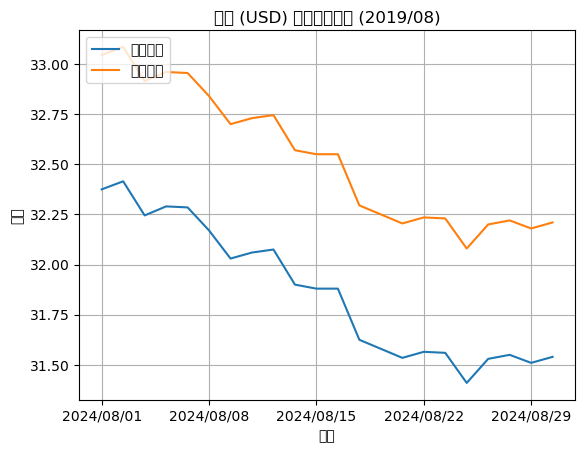

In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

# ÁõÆÊ®ôÁ∂≤ÂùÄÔºàÂè∞ÁÅ£ÈäÄË°åÁâåÂëäÂåØÁéáÔºâ
url = "https://rate.bot.com.tw/xrt?Lang=zh-TW"

# ÂèñÂæóÁ∂≤È†ÅÂÖßÂÆπ
headers = {"User-Agent": "Mozilla/5.0"}
resp = requests.get(url, headers=headers)
resp.encoding = "utf-8"

# Ëß£Êûê HTML
html = BeautifulSoup(resp.text, "lxml")
rate_table = html.find("table", attrs={"title": "ÁâåÂëäÂåØÁéá"}).find("tbody").find_all("tr")

# ÂèñÂæó„ÄåÁæéÈáë„ÄçÁöÑÊ≠∑Âè≤ÂåØÁéáÁ∂≤ÂùÄ
currency = rate_table[0].find("div", attrs={"class": "visible-phone print_hide"})
if currency:
    print(f"Ë≤®Âπ£Á®ÆÈ°ûÔºö{currency.get_text().strip()}")
else:
    print("‚ùå ÁÑ°Ê≥ïÊâæÂà∞Ë≤®Âπ£ÂêçÁ®±")
    exit()

history_link = rate_table[0].find("td", attrs={"data-table": "Ê≠∑Âè≤ÂåØÁéá"})
history_rate_link = "https://rate.bot.com.tw" + history_link.a["href"] if history_link and history_link.a else None

if not history_rate_link:
    print("‚ùå ÁÑ°Ê≥ïÊâæÂà∞Ê≠∑Âè≤ÂåØÁéáÈ†ÅÈù¢")
    exit()

# Ë®≠ÂÆöÊü•Ë©¢ 2019 Âπ¥ 8 ÊúàÁöÑÂåØÁéáÊ≠∑Âè≤
quote_history_url = history_rate_link.replace("history", "quote/2024-08")

# ÂèñÂæóÊ≠∑Âè≤ÂåØÁéáÈ†ÅÈù¢
resp = requests.get(quote_history_url, headers=headers)
resp.encoding = "utf-8"
history = BeautifulSoup(resp.text, "lxml")

# Ëß£ÊûêÊ≠∑Âè≤ÂåØÁéáË°®Ê†º
history_table = history.find("table", attrs={"title": "Ê≠∑Âè≤Êú¨Ë°åÁáüÊ•≠ÊôÇÈñìÁâåÂëäÂåØÁéá"}).find("tbody").find_all("tr")

# ÂÑ≤Â≠òÊï∏Êìö
date_history = []
history_buy = []
history_sell = []

for history_rate in history_table:
    # Á¢∫‰øùÊó•ÊúüÂ≠òÂú®
    date_tag = history_rate.find("a")
    if date_tag:
        date_string = date_tag.get_text().strip()
        try:
            date = datetime.strptime(date_string, "%Y/%m/%d").strftime("%Y/%m/%d")
            date_history.append(date)
        except ValueError:
            print(f"‚ùå Êó•ÊúüÊ†ºÂºèÈåØË™§Ôºö{date_string}")
            continue
    else:
        print("‚ùå ÁÑ°Ê≥ïÊâæÂà∞Êó•Êúü")
        continue

    # Êì∑ÂèñË≤∑ÂÖ• & Ë≥£Âá∫ÂåØÁéá
    history_ex_rate = history_rate.find_all("td", attrs={"class": "rate-content-cash text-right print_table-cell"})
    
    if len(history_ex_rate) >= 2:
        try:
            history_buy.append(float(history_ex_rate[0].get_text().strip()))
            history_sell.append(float(history_ex_rate[1].get_text().strip()))
        except ValueError:
            print("‚ùå ÂåØÁéáÊï∏ÂÄºÈåØË™§")
            continue
    else:
        print("‚ùå ÁÑ°Ê≥ïÊâæÂà∞ÂÆåÊï¥ÁöÑÂåØÁéáÊï∏Êìö")
        continue

# Âª∫Á´ã DataFrame
HistoryExchangeRate = pd.DataFrame({
    "date": date_history,
    "buy_rate": history_buy,
    "sell_rate": history_sell
})

# Ë®≠ÂÆöÊó•ÊúüÁÇ∫Á¥¢ÂºïÔºå‰∏¶ÊéíÂ∫è
HistoryExchangeRate.set_index("date", inplace=True)
HistoryExchangeRate.sort_index(ascending=True, inplace=True)

# Áπ™Ë£ΩÊ≠∑Âè≤ÂåØÁéáË∂®Âã¢Âúñ
plt.figure(figsize=(10, 6))
HistoryExchangeRate[["buy_rate", "sell_rate"]].plot()
plt.title("ÁæéÈáë (USD) Ê≠∑Âè≤ÂåØÁéáË∂®Âã¢ (2019/08)")
plt.xlabel("Êó•Êúü")
plt.ylabel("ÂåØÁéá")
plt.legend(["Ë≤∑ÂÖ•ÂåØÁéá", "Ë≥£Âá∫ÂåØÁéá"], loc="upper left")
plt.grid()
plt.show()


### ‰ΩúÊ•≠part 2ÔºöÁà¨ÂèñÊØèÁ®ÆË≤®Âπ£Â∞çÂè∞Âπ£ÁöÑ‰∏ÄÂÄãÊúàÊ≠∑Âè≤ÂåØÁéáË≥áÊñôÔºå‰∏¶Áï´Âá∫Ë∂®Âã¢Âúñ


ÁæéÈáë(USD)



<Figure size 720x576 with 0 Axes>

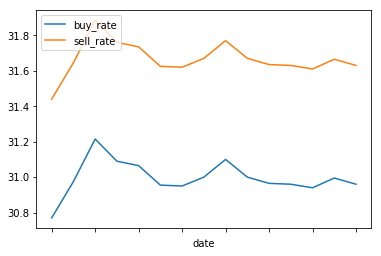


Ê∏ØÂπ£(HKD)



<Figure size 720x576 with 0 Axes>

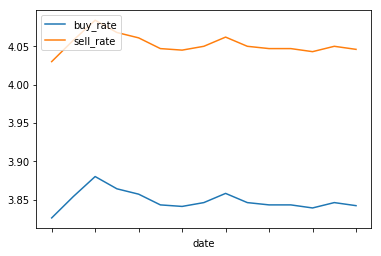


Ëã±Èéä(GBP)



<Figure size 720x576 with 0 Axes>

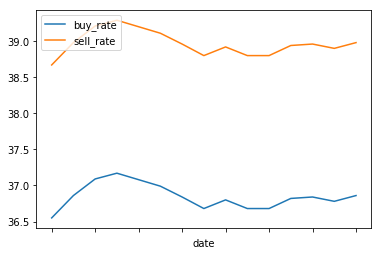


Êæ≥Âπ£(AUD)



<Figure size 720x576 with 0 Axes>

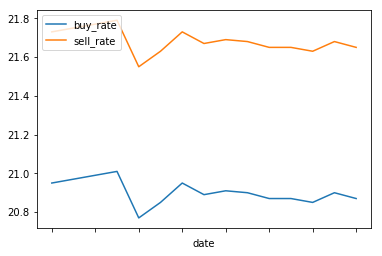


Âä†ÊãøÂ§ßÂπ£(CAD)



<Figure size 720x576 with 0 Axes>

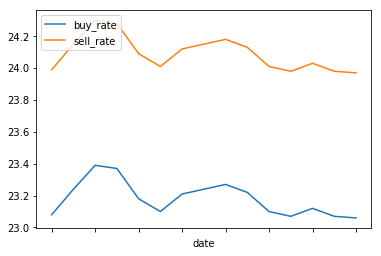


Êñ∞Âä†Âù°Âπ£(SGD)



<Figure size 720x576 with 0 Axes>

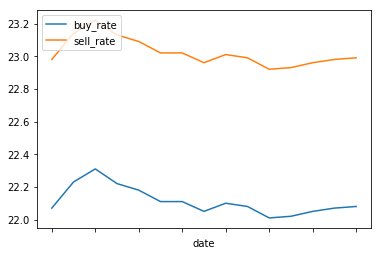


ÁëûÂ£´Ê≥ïÈÉé(CHF)



<Figure size 720x576 with 0 Axes>

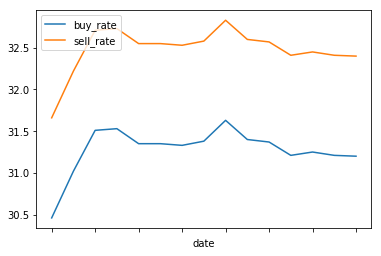


Êó•Âúì(JPY)



<Figure size 720x576 with 0 Axes>

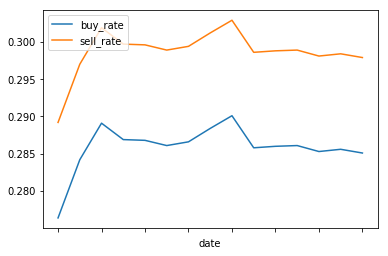


ÂçóÈùûÂπ£(ZAR)



<Figure size 720x576 with 0 Axes>

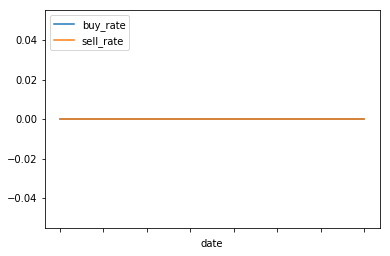


ÁëûÂÖ∏Âπ£(SEK)



<Figure size 720x576 with 0 Axes>

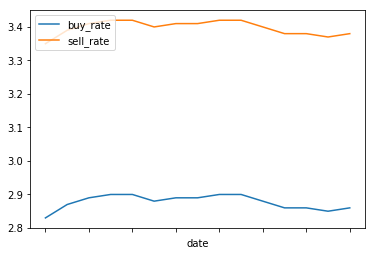


Á¥êÂÖÉ(NZD)



<Figure size 720x576 with 0 Axes>

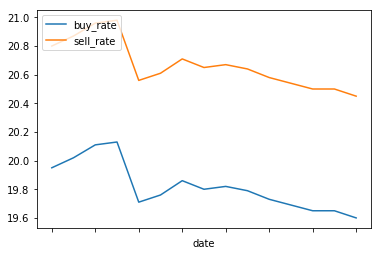


Ê≥∞Âπ£(THB)



<Figure size 720x576 with 0 Axes>

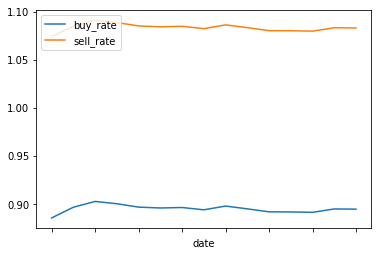


Ëè≤ÂúãÊØîÁ¥¢(PHP)



<Figure size 720x576 with 0 Axes>

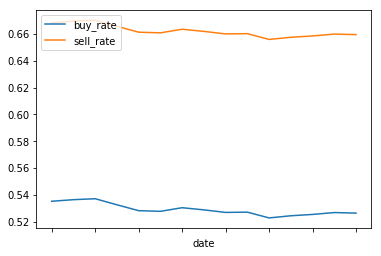


Âç∞Â∞ºÂπ£(IDR)



<Figure size 720x576 with 0 Axes>

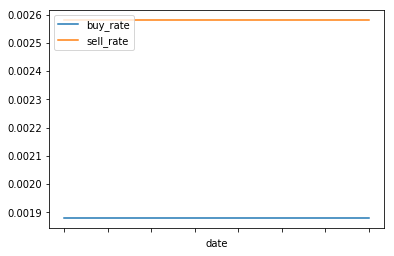


Ê≠êÂÖÉ(EUR)



<Figure size 720x576 with 0 Axes>

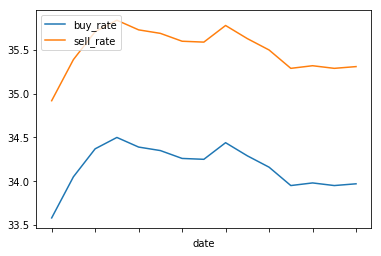


ÈüìÂÖÉ(KRW)



<Figure size 720x576 with 0 Axes>

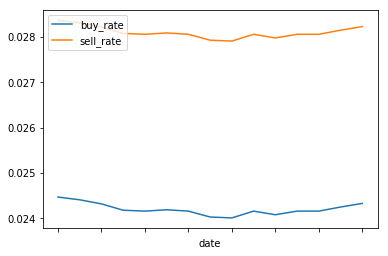


Ë∂äÂçóÁõæ(VND)



<Figure size 720x576 with 0 Axes>

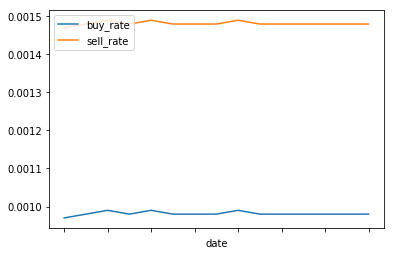


È¶¨‰æÜÂπ£(MYR)



<Figure size 720x576 with 0 Axes>

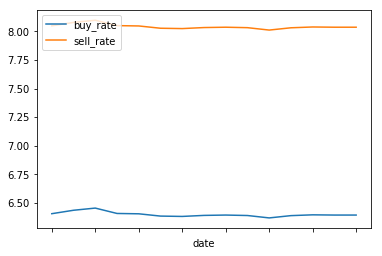


‰∫∫Ê∞ëÂπ£(CNY)



<Figure size 720x576 with 0 Axes>

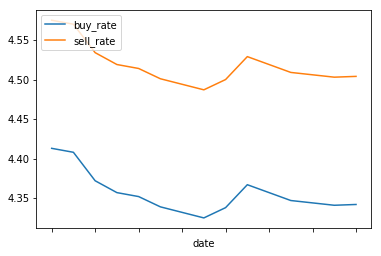

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

# ÁõÆÊ®ôÁ∂≤ÂùÄÔºàÂè∞ÁÅ£ÈäÄË°åÁâåÂëäÂåØÁéáÔºâ
url = "https://rate.bot.com.tw/xrt?Lang=zh-TW"

# ÂèñÂæóÁ∂≤È†ÅÂÖßÂÆπ
headers = {"User-Agent": "Mozilla/5.0"}
resp = requests.get(url, headers=headers)
resp.encoding = "utf-8"

# Ëß£Êûê HTML
html = BeautifulSoup(resp.text, "lxml")
rate_table = html.find("table", attrs={"title": "ÁâåÂëäÂåØÁéá"}).find("tbody").find_all("tr")

# ÂèñÂæó„ÄåÁæéÈáë„ÄçÁöÑÊ≠∑Âè≤ÂåØÁéáÁ∂≤ÂùÄ
currency = rate_table[0].find("div", attrs={"class": "visible-phone print_hide"})
if currency:
    print(f"Ë≤®Âπ£Á®ÆÈ°ûÔºö{currency.get_text().strip()}")
else:
    print("‚ùå ÁÑ°Ê≥ïÊâæÂà∞Ë≤®Âπ£ÂêçÁ®±")
    exit()

history_link = rate_table[0].find("td", attrs={"data-table": "Ê≠∑Âè≤ÂåØÁéá"})
history_rate_link = "https://rate.bot.com.tw" + history_link.a["href"] if history_link and history_link.a else None

if not history_rate_link:
    print("‚ùå ÁÑ°Ê≥ïÊâæÂà∞Ê≠∑Âè≤ÂåØÁéáÈ†ÅÈù¢")
    exit()

# Ë®≠ÂÆöÊü•Ë©¢ 2019 Âπ¥ 8 ÊúàÁöÑÂåØÁéáÊ≠∑Âè≤
quote_history_url = history_rate_link.replace("history", "quote/2024-08")

# ÂèñÂæóÊ≠∑Âè≤ÂåØÁéáÈ†ÅÈù¢
resp = requests.get(quote_history_url, headers=headers)
resp.encoding = "utf-8"
history = BeautifulSoup(resp.text, "lxml")

# Ëß£ÊûêÊ≠∑Âè≤ÂåØÁéáË°®Ê†º
history_table = history.find("table", attrs={"title": "Ê≠∑Âè≤Êú¨Ë°åÁáüÊ•≠ÊôÇÈñìÁâåÂëäÂåØÁéá"}).find("tbody").find_all("tr")

# ÂÑ≤Â≠òÊï∏Êìö
date_history = []
history_buy = []
history_sell = []

for history_rate in history_table:
    # Á¢∫‰øùÊó•ÊúüÂ≠òÂú®
    date_tag = history_rate.find("a")
    if date_tag:
        date_string = date_tag.get_text().strip()
        try:
            date = datetime.strptime(date_string, "%Y/%m/%d").strftime("%Y/%m/%d")
            date_history.append(date)
        except ValueError:
            print(f"‚ùå Êó•ÊúüÊ†ºÂºèÈåØË™§Ôºö{date_string}")
            continue
    else:
        print("‚ùå ÁÑ°Ê≥ïÊâæÂà∞Êó•Êúü")
        continue

    # Êì∑ÂèñË≤∑ÂÖ• & Ë≥£Âá∫ÂåØÁéá
    history_ex_rate = history_rate.find_all("td", attrs={"class": "rate-content-cash text-right print_table-cell"})
    
    if len(history_ex_rate) >= 2:
        try:
            history_buy.append(float(history_ex_rate[0].get_text().strip()))
            history_sell.append(float(history_ex_rate[1].get_text().strip()))
        except ValueError:
            print("‚ùå ÂåØÁéáÊï∏ÂÄºÈåØË™§")
            continue
    else:
        print("‚ùå ÁÑ°Ê≥ïÊâæÂà∞ÂÆåÊï¥ÁöÑÂåØÁéáÊï∏Êìö")
        continue

# Âª∫Á´ã DataFrame
HistoryExchangeRate = pd.DataFrame({
    "date": date_history,
    "buy_rate": history_buy,
    "sell_rate": history_sell
})

# Ë®≠ÂÆöÊó•ÊúüÁÇ∫Á¥¢ÂºïÔºå‰∏¶ÊéíÂ∫è
HistoryExchangeRate.set_index("date", inplace=True)
HistoryExchangeRate.sort_index(ascending=True, inplace=True)

# Áπ™Ë£ΩÊ≠∑Âè≤ÂåØÁéáË∂®Âã¢Âúñ
plt.figure(figsize=(10, 6))
HistoryExchangeRate[["buy_rate", "sell_rate"]].plot()
plt.title("ÁæéÈáë (USD) Ê≠∑Âè≤ÂåØÁéáË∂®Âã¢ (2019/08)")
plt.xlabel("Êó•Êúü")
plt.ylabel("ÂåØÁéá")
plt.legend(["Ë≤∑ÂÖ•ÂåØÁéá", "Ë≥£Âá∫ÂåØÁéá"], loc="upper left")
plt.grid()
plt.show()


üîç Ê≠£Âú®Êü•Ë©¢ ÁæéÈáë (USD) (2025-01) ÁöÑÊ≠∑Âè≤ÂåØÁéá...
üîç Ê≠£Âú®Êü•Ë©¢ Ê∏ØÂπ£ (HKD) (2025-01) ÁöÑÊ≠∑Âè≤ÂåØÁéá...
üîç Ê≠£Âú®Êü•Ë©¢ Ëã±Èéä (GBP) (2025-01) ÁöÑÊ≠∑Âè≤ÂåØÁéá...
üîç Ê≠£Âú®Êü•Ë©¢ Êæ≥Âπ£ (AUD) (2025-01) ÁöÑÊ≠∑Âè≤ÂåØÁéá...
üîç Ê≠£Âú®Êü•Ë©¢ Âä†ÊãøÂ§ßÂπ£ (CAD) (2025-01) ÁöÑÊ≠∑Âè≤ÂåØÁéá...
üîç Ê≠£Âú®Êü•Ë©¢ Êñ∞Âä†Âù°Âπ£ (SGD) (2025-01) ÁöÑÊ≠∑Âè≤ÂåØÁéá...
üîç Ê≠£Âú®Êü•Ë©¢ ÁëûÂ£´Ê≥ïÈÉé (CHF) (2025-01) ÁöÑÊ≠∑Âè≤ÂåØÁéá...
üîç Ê≠£Âú®Êü•Ë©¢ Êó•Âúì (JPY) (2025-01) ÁöÑÊ≠∑Âè≤ÂåØÁéá...
üîç Ê≠£Âú®Êü•Ë©¢ ÂçóÈùûÂπ£ (ZAR) (2025-01) ÁöÑÊ≠∑Âè≤ÂåØÁéá...
üîç Ê≠£Âú®Êü•Ë©¢ ÁëûÂÖ∏Âπ£ (SEK) (2025-01) ÁöÑÊ≠∑Âè≤ÂåØÁéá...
üîç Ê≠£Âú®Êü•Ë©¢ Á¥êÂÖÉ (NZD) (2025-01) ÁöÑÊ≠∑Âè≤ÂåØÁéá...
üîç Ê≠£Âú®Êü•Ë©¢ Ê≥∞Âπ£ (THB) (2025-01) ÁöÑÊ≠∑Âè≤ÂåØÁéá...
üîç Ê≠£Âú®Êü•Ë©¢ Ëè≤ÂúãÊØîÁ¥¢ (PHP) (2025-01) ÁöÑÊ≠∑Âè≤ÂåØÁéá...
üîç Ê≠£Âú®Êü•Ë©¢ Âç∞Â∞ºÂπ£ (IDR) (2025-01) ÁöÑÊ≠∑Âè≤ÂåØÁéá...
üîç Ê≠£Âú®Êü•Ë©¢ Ê≠êÂÖÉ (EUR) (2025-01) ÁöÑÊ≠∑Âè≤ÂåØÁéá...
üîç Ê≠£Âú®Êü•Ë©¢ ÈüìÂÖÉ (KRW) (2025-01) ÁöÑÊ≠∑Âè≤ÂåØÁéá...
üîç Ê≠

C:\Users\a7890\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 28207 (\N{CJK UNIFIED IDEOGRAPH-6E2F}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\a7890\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 33521 (\N{CJK UNIFIED IDEOGRAPH-82F1}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\a7890\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 37770 (\N{CJK UNIFIED IDEOGRAPH-938A}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\a7890\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 28595 (\N{CJK UNIFIED IDEOGRAPH-6FB3}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\a7890\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 211

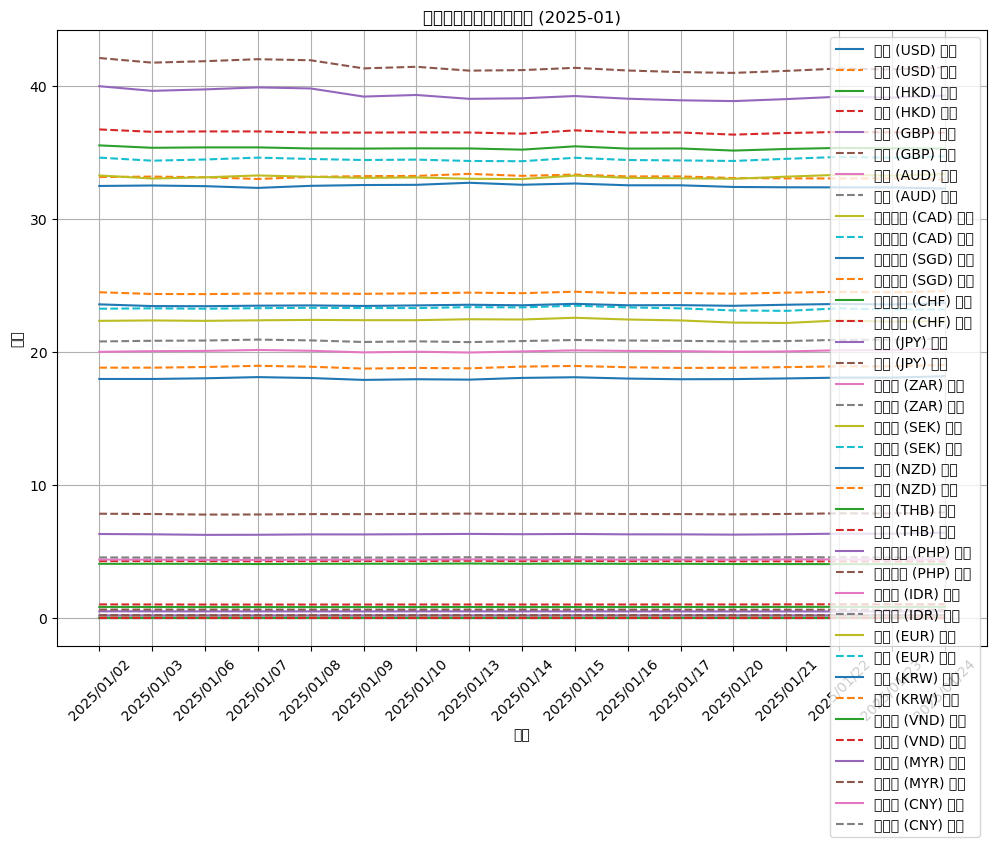

In [4]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import time
from datetime import datetime

# ÁõÆÊ®ôÁ∂≤ÂùÄÔºàÂè∞ÁÅ£ÈäÄË°åÁâåÂëäÂåØÁéáÔºâ
url = "https://rate.bot.com.tw/xrt?Lang=zh-TW"

# ÂèñÂæóÁ∂≤È†ÅÂÖßÂÆπ
headers = {"User-Agent": "Mozilla/5.0"}
resp = requests.get(url, headers=headers)
resp.encoding = "utf-8"

# Ëß£Êûê HTML
html = BeautifulSoup(resp.text, "lxml")
rate_table = html.find("table", attrs={"title": "ÁâåÂëäÂåØÁéá"}).find("tbody").find_all("tr")

# ÂÑ≤Â≠òÊâÄÊúâË≤®Âπ£ÁöÑÊ≠∑Âè≤ÂåØÁéáÈÄ£Áµê
currency_history_links = {}

for row in rate_table:
    currency = row.find("div", class_="visible-phone print_hide")  # Ë≤®Âπ£ÂêçÁ®±
    history_link = row.find("td", attrs={"data-table": "Ê≠∑Âè≤ÂåØÁéá"})  # Ê≠∑Âè≤ÂåØÁéáÁ∂≤ÂùÄ

    if currency and history_link and history_link.a:
        currency_name = currency.get_text().strip()
        history_rate_link = "https://rate.bot.com.tw" + history_link.a["href"]
        currency_history_links[currency_name] = history_rate_link

# Ë®≠ÂÆöÊü•Ë©¢ÁöÑÊ≠∑Âè≤Êúà‰ªΩÔºà‰æãÂ¶Ç 2023 Âπ¥ 1 ÊúàÔºâ
query_date = "2025-01"

# ÂÑ≤Â≠òÊâÄÊúâË≤®Âπ£ÁöÑÊ≠∑Âè≤ÂåØÁéá
all_currency_data = {}

for currency_name, history_link in currency_history_links.items():
    # ÂèñÂæóË©≤Ë≤®Âπ£ÁöÑÁâπÂÆöÊúà‰ªΩÂåØÁéá
    quote_history_url = history_link.replace("history", f"quote/{query_date}")
    
    print(f"üîç Ê≠£Âú®Êü•Ë©¢ {currency_name} ({query_date}) ÁöÑÊ≠∑Âè≤ÂåØÁéá...")
    time.sleep(1)  # ÈÅøÂÖçË´ãÊ±ÇÈÅéÂø´Ë¢´Â∞ÅÈéñ

    resp = requests.get(quote_history_url, headers=headers)
    resp.encoding = "utf-8"
    history = BeautifulSoup(resp.text, "lxml")

    # Ê™¢Êü•ÊòØÂê¶Êúâ„ÄåÊü•ÁÑ°Ë≥áÊñô„ÄçË®äÊÅØ
    no_data_message = history.find("td", class_="text-center", colspan="6")
    if no_data_message and "Êâæ‰∏çÂà∞‰ªª‰Ωï‰∏ÄÁ≠ÜË≥áÊñô" in no_data_message.get_text():
        print(f"‚ùå {currency_name} ({query_date}) Ê≤íÊúâÊ≠∑Âè≤Êï∏ÊìöÔºÅ")
        continue

    # Ëß£ÊûêÊ≠∑Âè≤ÂåØÁéáË°®Ê†º
    history_table = history.find("table", attrs={"title": "Ê≠∑Âè≤Êú¨Ë°åÁáüÊ•≠ÊôÇÈñìÁâåÂëäÂåØÁéá"}).find("tbody").find_all("tr")

    date_history = []
    history_buy = []
    history_sell = []

    for history_rate in history_table:
        # Êì∑ÂèñÊó•Êúü
        date_tag = history_rate.find("a")
        if date_tag:
            date_string = date_tag.get_text().strip()
            try:
                date = datetime.strptime(date_string, "%Y/%m/%d").strftime("%Y/%m/%d")
                date_history.append(date)
            except ValueError:
                continue
        else:
            continue

        # Êì∑ÂèñË≤∑ÂÖ• & Ë≥£Âá∫ÂåØÁéá
        history_ex_rate = history_rate.find_all("td", attrs={"class": "rate-content-cash text-right print_table-cell"})
        if len(history_ex_rate) >= 2:
            try:
                history_buy.append(float(history_ex_rate[0].get_text().strip()))
                history_sell.append(float(history_ex_rate[1].get_text().strip()))
            except ValueError:
                continue
        else:
            continue

    # Âª∫Á´ã DataFrame
    if date_history:
        df = pd.DataFrame({
            "date": date_history,
            "buy_rate": history_buy,
            "sell_rate": history_sell
        })
        df.set_index("date", inplace=True)
        df.sort_index(ascending=True, inplace=True)

        all_currency_data[currency_name] = df

print("\n‚úÖ ÊâÄÊúâË≤®Âπ£ÁöÑÊ≠∑Âè≤ÂåØÁéáÁà¨ÂèñÂÆåÊàêÔºÅ")

# Áï´Âá∫ÊâÄÊúâË≤®Âπ£ÁöÑÊ≠∑Âè≤ÂåØÁéáË∂®Âã¢Âúñ
plt.figure(figsize=(12, 8))

for currency_name, df in all_currency_data.items():
    plt.plot(df.index, df["buy_rate"], label=f"{currency_name} Ë≤∑ÂÖ•")
    plt.plot(df.index, df["sell_rate"], linestyle="dashed", label=f"{currency_name} Ë≥£Âá∫")

plt.title(f"ÊâÄÊúâË≤®Âπ£ÁöÑÊ≠∑Âè≤ÂåØÁéáË∂®Âã¢ ({query_date})")
plt.xlabel("Êó•Êúü")
plt.ylabel("ÂåØÁéá")
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.show()
